<a href="https://colab.research.google.com/github/PradyothPrakash08/Mini-Project/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images=[]
flat_data =[]

DATADIR = '/content/drive/My Drive/ML /images'
CATEGORIES = ['coke','fanta','pepsi']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  #print(path)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target_data = np.array(target)
images = np.array(images)

In [2]:
len(flat_data[0])

67500

In [3]:
target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

<BarContainer object of 3 artists>

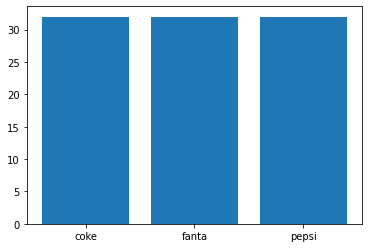

In [4]:
unique,count = np.unique(target,return_counts= True)
plt.bar(CATEGORIES,count)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=100)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc=svm.SVC(probability=True)
clf= GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 2,
       0, 0, 1, 0, 0, 1, 1])

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
accuracy_score(y_pred,y_test)

0.896551724137931

In [10]:
confusion_matrix(y_pred,y_test)

array([[9, 0, 0],
       [2, 9, 0],
       [1, 0, 8]])

In [11]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.82      0.90        11
           2       1.00      0.89      0.94         9

    accuracy                           0.90        29
   macro avg       0.92      0.90      0.90        29
weighted avg       0.92      0.90      0.90        29



In [12]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [13]:
model = pickle.load(open('img_model.p','rb'))

Enter yor URLhttps://www.tofucute.com/images/11CN105-10_fanta_can_cream_soda_large.jpg
(900, 907, 3)
 PREDICTED OUTPUT: fanta


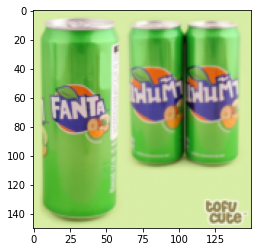

In [14]:
#Testing a brand new image
flat_data = []
url = input('Enter yor URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')